In [1]:
import pandas as pd
import numpy as np
import pickle
import spacy
#pip install spacy  #uncomment first time # in env!!!

Перенесу в env!!!

In [2]:
#!pip install spacy #uncomment first time 

In [3]:
#!python -m spacy download ru_core_news_sm  #uncomment first time 

Загрузили русскую модель из spaCy

In [4]:
nlp = spacy.load('ru_core_news_sm')

Выделили отдельно массив текстовых описаний

## Эксперимент только по 1 классу

In [5]:
table_2_10_6 = pd.read_pickle('random_sample_200k.pickle')


In [7]:
table_2_10_6.head()

,text,new_code
4004427,Термостат суховоздушный ТВ-80-1,33
4551450,Услуги по холодному водоснабжению,36
6579286,СС КонсультантСудебнаяПрактика: Суды Москвы и ...,62
1028808,Короб архивный на завязках № 1,17
2281960,Степлер,25


In [8]:
text = list(table_2_10_6['text'])

Построение эмбеддингов по текстовым описаниям

In [10]:
import time
start_time = time.time()

embeddings = [nlp(stat).vector for stat in text]
print("--- %s seconds ---" % (time.time() - start_time))

--- 1386.3007853031158 seconds ---


Создание массива меток (оставляем только первые 4 цифры классификатора)

In [ ]:
#labels = np.array([int(''.join(code[:7].split('.'))) for code in table_2_10_6['OKPD2']])

In [30]:
labels = np.array(table_2_10_6['new_code'])


Разбиение выборки на train и test

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
model = LogisticRegression(max_iter=1000, multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 466.3089735507965 seconds ---


Построение ROC кривой

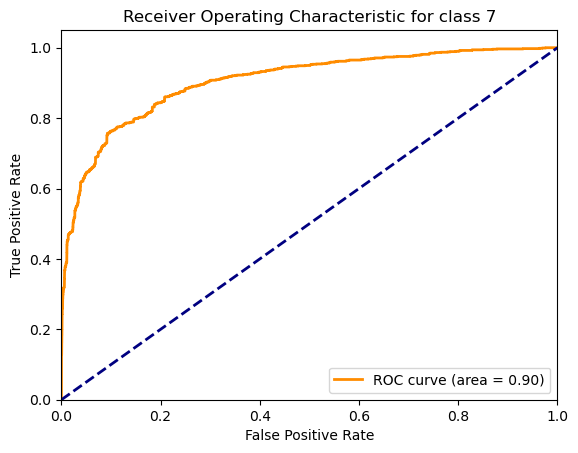

In [25]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]-1):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i-1], y_score[:, i-1])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривой для первого класса
plt.figure()
class_number =7
plt.plot(fpr[class_number], tpr[class_number], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[class_number])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for class 7')
plt.legend(loc="lower right")
plt.show()


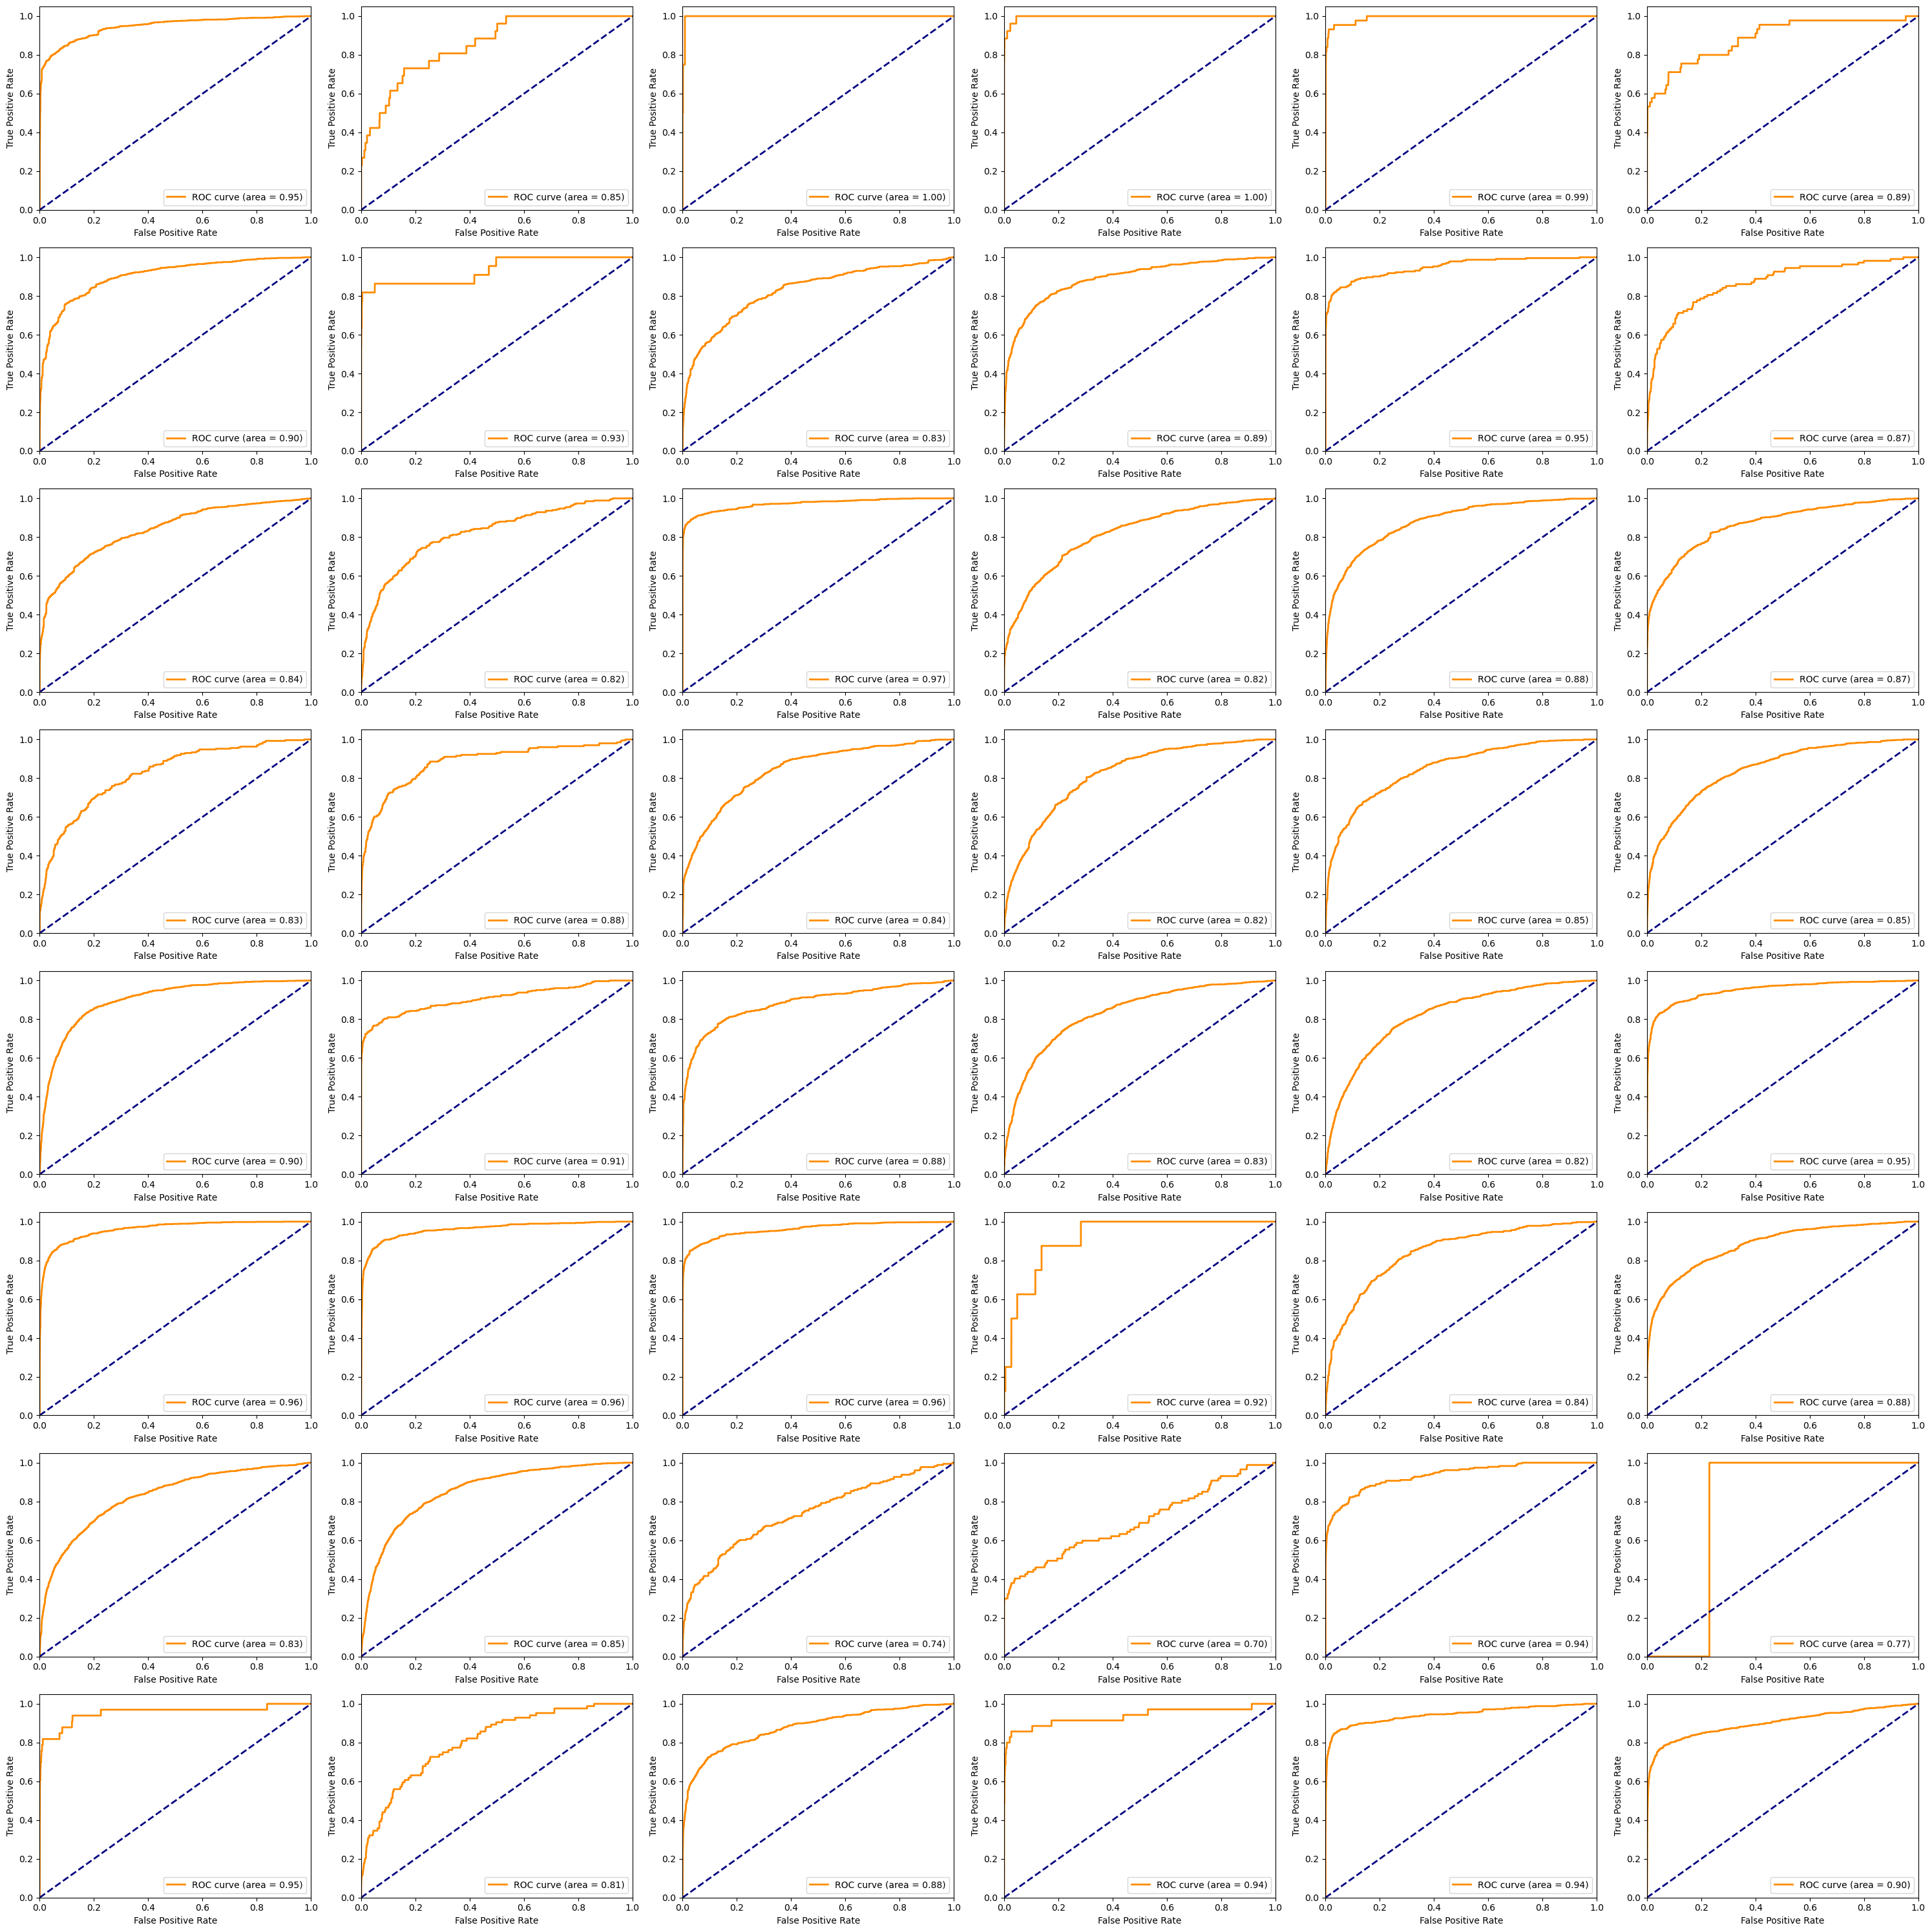

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предполагается, что y_test_binarized и y_score уже вычислены
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 48

# Вычисление ROC AUC для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Создание фигуры для подграфиков
fig, axes = plt.subplots(8, 6, figsize=(30, 30))  # Размер фигуры можно настроить
axes = axes.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()


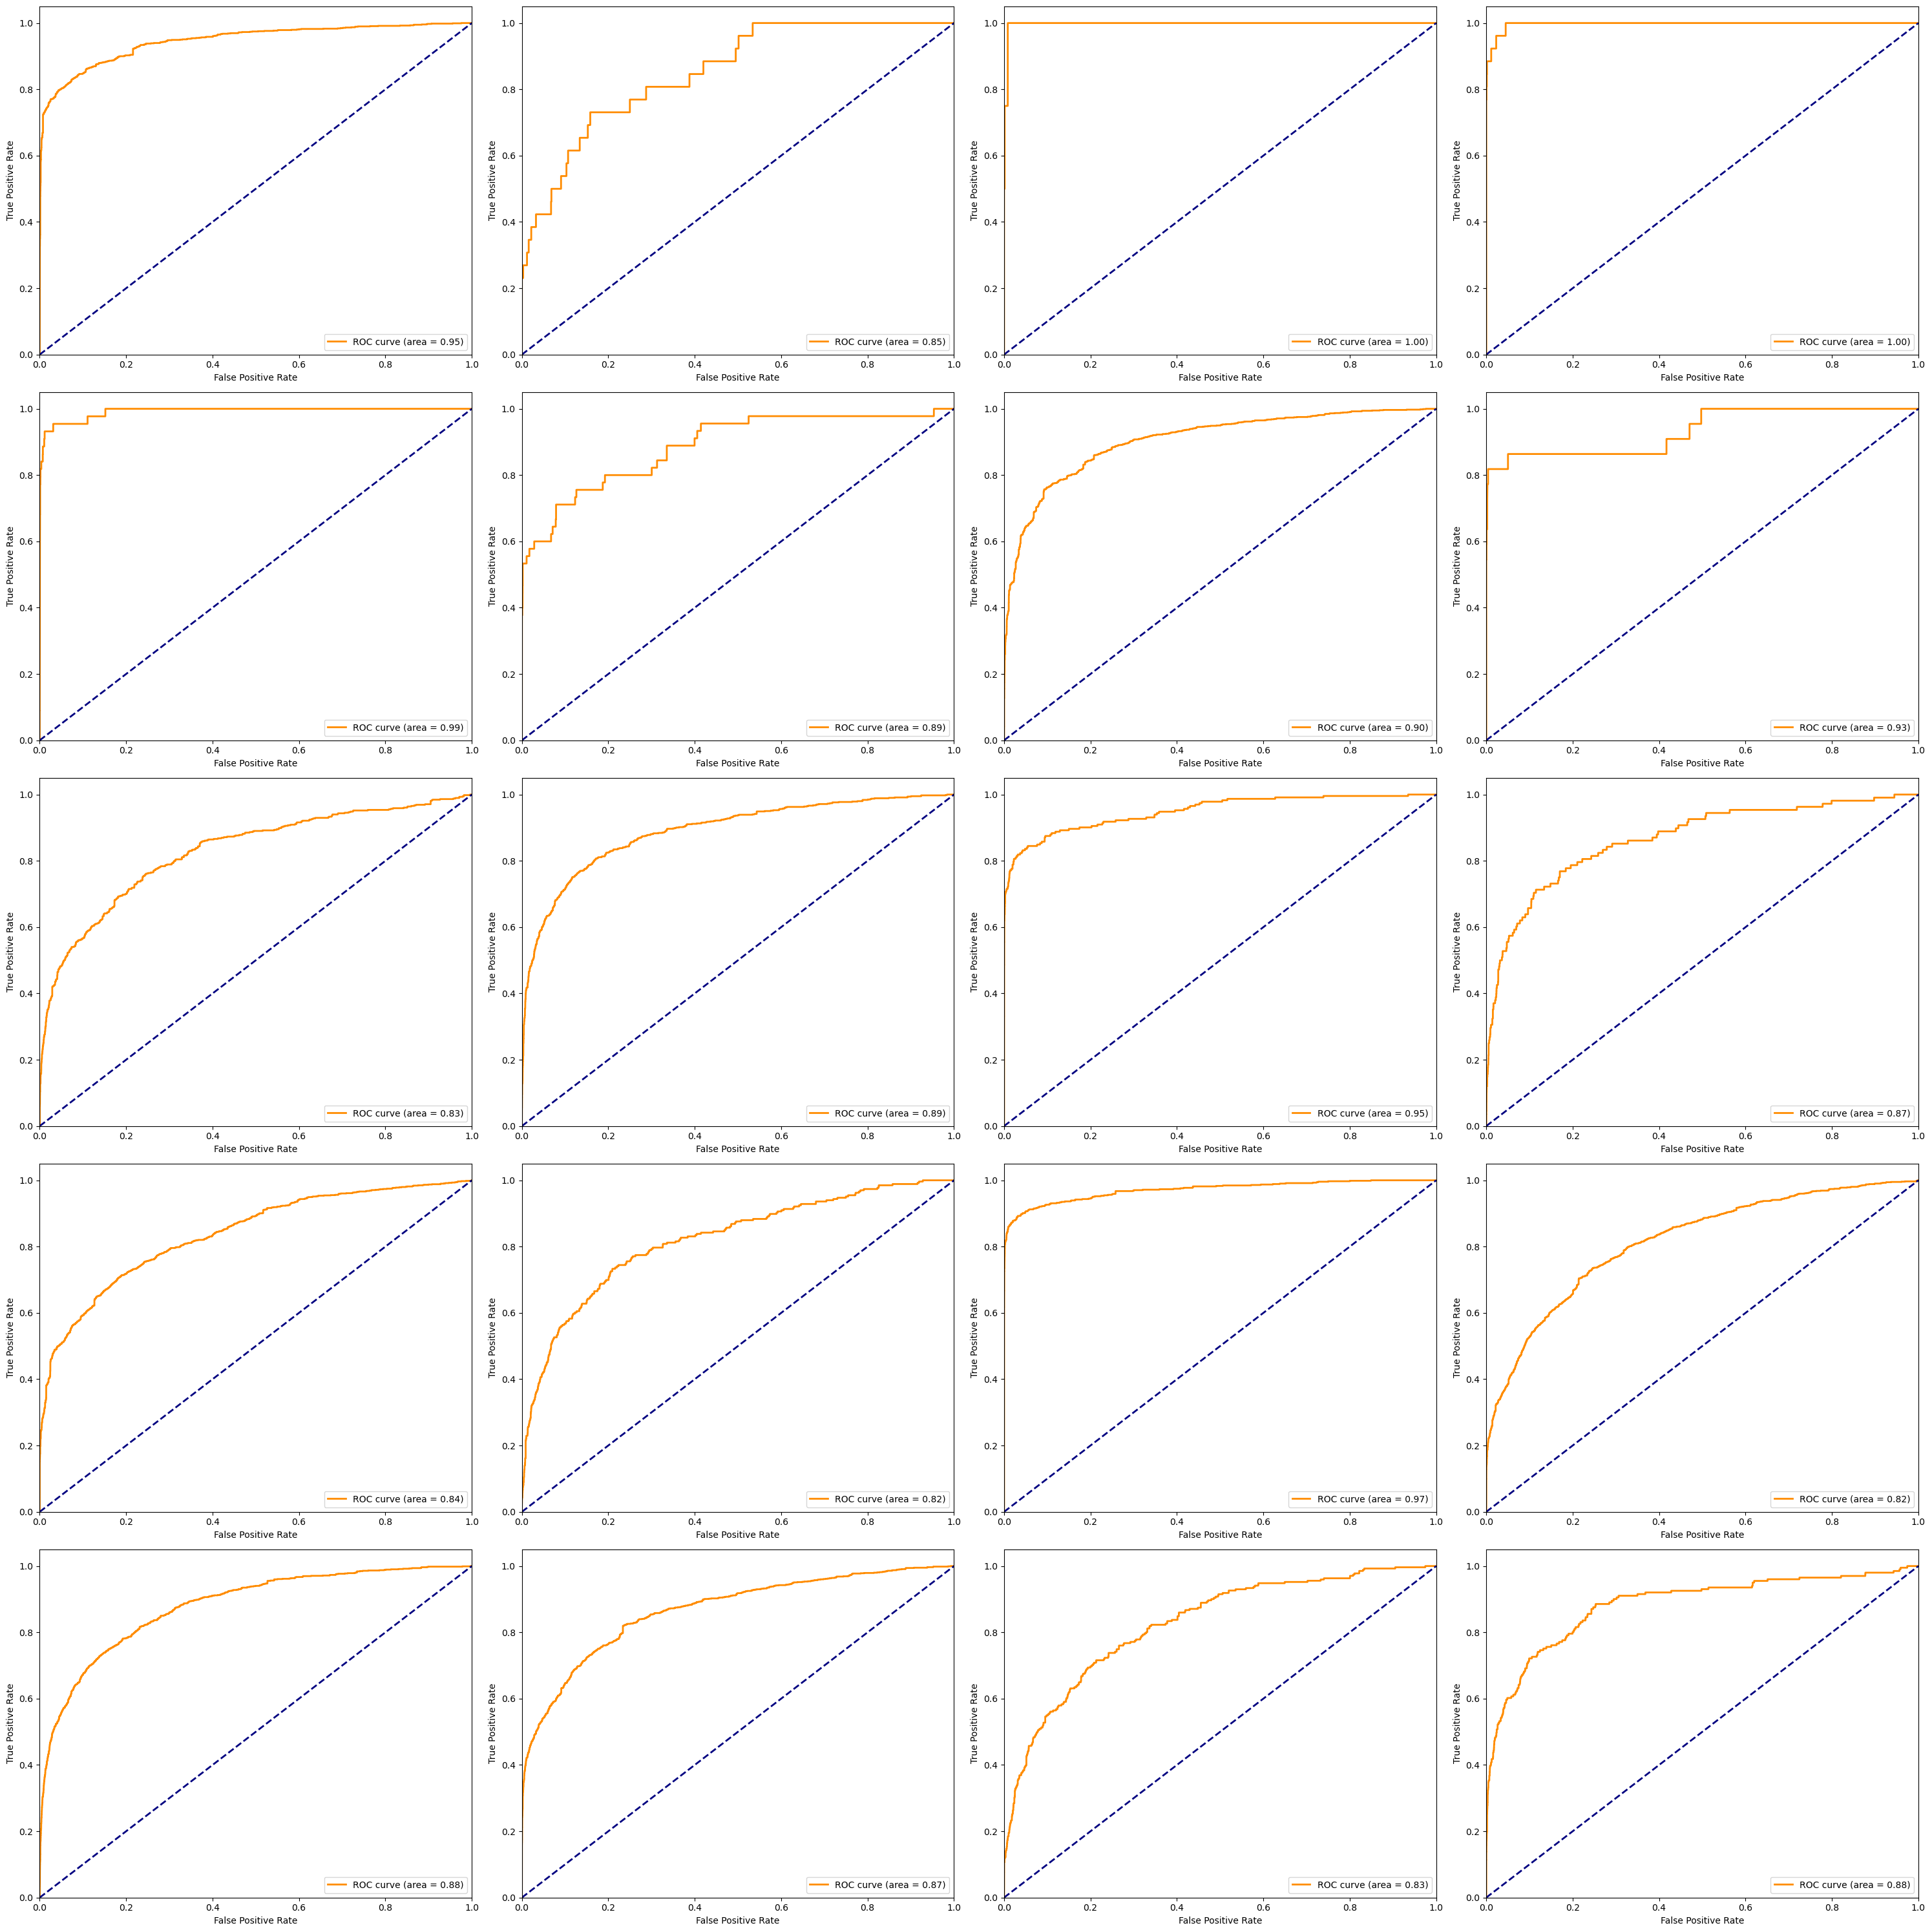

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Предполагается, что y_test_binarized и y_score уже вычислены
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 20

# Вычисление ROC AUC для каждого класса
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Создание фигуры для подграфиков
fig, axes = plt.subplots(5, 4, figsize=(30, 30))  # Размер фигуры можно настроить
axes = axes.ravel()  # Преобразование матрицы осей в плоский массив

for i in range(n_classes):
    axes[i].plot(fpr[i], tpr[i], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[i])
    axes[i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0.0, 1.0])
    axes[i].set_ylim([0.0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    #axes[i].set_title(f'Receiver Operating Characteristic for class {i}')
    axes[i].legend(loc="lower right")

plt.tight_layout()  # Автоматическая корректировка подграфиков для предотвращения наложения
plt.show()